In [121]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import pandas as pd
from scipy.misc import derivative
import time

In [122]:
data= pd.read_csv("Hahn1_Data.txt",names=['y','x','niks'], sep=" ")

data

,y,x,niks
NaN,0.591,24.41,NaN
NaN,1.547,34.82,NaN
NaN,2.902,44.09,NaN
NaN,2.894,45.07,NaN
NaN,4.703,54.98,NaN
...,...,...,...
NaN,21.035,849.93,NaN
NaN,20.930,851.61,NaN
NaN,21.074,849.75,NaN
NaN,21.085,850.98,NaN


In [123]:
y = torch.from_numpy(data['y'].to_numpy(np.float64))
x = torch.from_numpy(data['x'].to_numpy(np.float64))

# b = torch.tensor([10.0,-1.0,0.05,-0.00001,-0.05,0.001,-0.000001],requires_grad=True)
b = torch.tensor([1.0,-.1,0.005,-0.000001,-0.005,0.0001,-0.0000001],requires_grad=True)


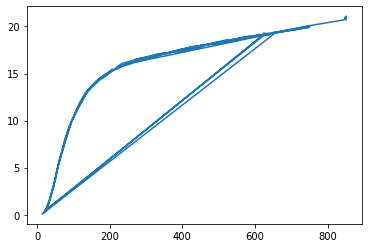

In [124]:
plt.plot(x.numpy(),y.numpy())

In [125]:
## Numerical Differentiation

b = np.array([1.0,-.1,0.005,-0.000001,-0.005,0.0001,-0.0000001]).reshape(-1,1)

x=x.detach().numpy()

u=0.1 #beta multiply identity matrix
beta = 10
V_prev = 0


def f0(b0):
    return  (b0+b[1]*x+b[2]*np.power(x,2)+b[3]*np.power(x,3))/(1+b[4]*x+b[5]*np.power(x,2)+b[6]*np.power(x,3))-y.detach().numpy()  
def f1(b1):
    return  (b[0]+b1*x+b[2]*np.power(x,2)+b[3]*np.power(x,3))/(1+b[4]*x+b[5]*np.power(x,2)+b[6]*np.power(x,3))-y.detach().numpy()   
def f2(b2):
    return (b[0]+b[1]*x+b2*np.power(x,2)+b[3]*np.power(x,3))/(1+b[4]*x+b[5]*np.power(x,2)+b[6]*np.power(x,3))-y.detach().numpy() 
def f3(b3):
    return  (b[0]+b[1]*x+b[2]*np.power(x,2)+b3*np.power(x,3))/(1+b[4]*x+b[5]*np.power(x,2)+b[6]*np.power(x,3))-y.detach().numpy()  
def f4(b4):
    return  (b[0]+b[1]*x+b[2]*np.power(x,2)+b[3]*np.power(x,3))/(1+b4*x+b[5]*np.power(x,2)+b[6]*np.power(x,3))-y.detach().numpy()   
def f5(b5):
    return (b[0]+b[1]*x+b[2]*np.power(x,2)+b[3]*np.power(x,3))/(1+b[4]*x+b5*np.power(x,2)+b[6]*np.power(x,3))-y.detach().numpy() 
def f6(b6):
    return  (b[0]+b[1]*x+b[2]*np.power(x,2)+b[3]*np.power(x,3))/(1+b[4]*x+b[5]*np.power(x,2)+b6*np.power(x,3))-y.detach().numpy()  

start_time = time.perf_counter()   
    
for c in range(500):

    y_pred = (b[0]+b[1]*x+b[2]*np.power(x,2)+b[3]*np.power(x,3))/(1+b[4]*x+b[5]*np.power(x,2)+b[6]*np.power(x,3)) 
    error = (y_pred - y.detach().numpy()).reshape(-1,1)
    
    d_b0 = derivative(f0,b[0] , dx=1e-6)
    d_b1 = derivative(f1,b[1] , dx=1e-6)
    d_b2 = derivative(f2,b[2] , dx=1e-6)
    d_b3 = derivative(f3,b[3] , dx=1e-6)
    d_b4 = derivative(f4,b[4] , dx=1e-6)
    d_b5 = derivative(f5,b[5] , dx=1e-6)
    d_b6 = derivative(f6,b[6] , dx=1e-6)
    
     
    jacobian = np.transpose(np.array([d_b0,d_b1,d_b2,d_b3,d_b4,d_b5,d_b6]))
    dParam = np.matmul(np.matmul(np.linalg.inv((np.matmul(np.transpose(jacobian),jacobian)+u*np.identity(len(b)))),np.transpose(jacobian)),error)
    b -= dParam
    V = np.sum(np.square(error))
    if(V > V_prev):
            u *= beta
    else:
            u /= beta
    V_prev = V
    print("c: ",c," error: ",V," B:", b)
    
    if V < 1.5324382857:
        break
print("time taken to execute: ",time.perf_counter()-start_time)  
print("SD error is", np.std(np.square(error)))

c:  0  error:  2093448.2017419622  B: [[-1.59793835e+00]
 [ 4.49196912e-02]
 [ 1.61918461e-03]
 [-1.52744946e-06]
 [-3.75624123e-03]
 [ 9.89421924e-05]
 [-9.99395120e-08]]
c:  1  error:  2598.995764266339  B: [[-1.72452236e+00]
 [ 5.09681930e-02]
 [ 1.61489600e-03]
 [-1.47367083e-06]
 [-1.81393648e-03]
 [ 1.02267956e-04]
 [-9.99655717e-08]]
c:  2  error:  199.22515865280565  B: [[-1.45932858e+00]
 [ 3.50057102e-02]
 [ 1.83143426e-03]
 [-1.40998283e-06]
 [-2.01365839e-03]
 [ 1.15341441e-04]
 [-9.96946426e-08]]
c:  3  error:  32.65811215043939  B: [[-6.88263351e-01]
 [-7.06530555e-03]
 [ 2.29542230e-03]
 [-1.24018873e-06]
 [-3.73948826e-03]
 [ 1.44419849e-04]
 [-9.96957992e-08]]
c:  4  error:  9.241085189661765  B: [[ 1.61605273e-01]
 [-5.83119880e-02]
 [ 2.98323819e-03]
 [-1.05885417e-06]
 [-5.21231066e-03]
 [ 1.84399054e-04]
 [-9.99580279e-08]]
c:  5  error:  3.1928614461969858  B: [[ 6.90247877e-01]
 [-9.36097387e-02]
 [ 3.53721192e-03]
 [-9.60233514e-07]
 [-5.80228191e-03]
 [ 2.14810

c:  91  error:  1.556305665025861  B: [[ 8.53550881e-01]
 [-1.05106278e-01]
 [ 3.73097470e-03]
 [-9.28500036e-07]
 [-5.91168486e-03]
 [ 2.25095342e-04]
 [-9.95757983e-08]]
c:  92  error:  1.5563056650259843  B: [[ 8.53550881e-01]
 [-1.05106278e-01]
 [ 3.73097470e-03]
 [-9.28500036e-07]
 [-5.91168486e-03]
 [ 2.25095342e-04]
 [-9.95757983e-08]]
c:  93  error:  1.5563056650259988  B: [[ 8.53550881e-01]
 [-1.05106278e-01]
 [ 3.73097470e-03]
 [-9.28500036e-07]
 [-5.91168486e-03]
 [ 2.25095342e-04]
 [-9.95757983e-08]]
c:  94  error:  1.556305665025995  B: [[ 8.53550881e-01]
 [-1.05106278e-01]
 [ 3.73097470e-03]
 [-9.28500036e-07]
 [-5.91168486e-03]
 [ 2.25095342e-04]
 [-9.95757983e-08]]
c:  95  error:  1.556305665025995  B: [[ 8.53550881e-01]
 [-1.05106278e-01]
 [ 3.73097470e-03]
 [-9.28500036e-07]
 [-5.91168486e-03]
 [ 2.25095342e-04]
 [-9.95757983e-08]]
c:  96  error:  1.5563056650259899  B: [[ 8.53550881e-01]
 [-1.05106278e-01]
 [ 3.73097470e-03]
 [-9.28500036e-07]
 [-5.91168486e-03]
 [ 2

c:  177  error:  1.5563056650271163  B: [[ 8.53550881e-01]
 [-1.05106278e-01]
 [ 3.73097470e-03]
 [-9.28500036e-07]
 [-5.91168486e-03]
 [ 2.25095342e-04]
 [-9.95757983e-08]]
c:  178  error:  1.5563056650271163  B: [[ 8.53550881e-01]
 [-1.05106278e-01]
 [ 3.73097470e-03]
 [-9.28500036e-07]
 [-5.91168486e-03]
 [ 2.25095342e-04]
 [-9.95757983e-08]]
c:  179  error:  1.5563056650271163  B: [[ 8.53550881e-01]
 [-1.05106278e-01]
 [ 3.73097470e-03]
 [-9.28500036e-07]
 [-5.91168486e-03]
 [ 2.25095342e-04]
 [-9.95757983e-08]]
c:  180  error:  1.556305665027117  B: [[ 8.53550881e-01]
 [-1.05106278e-01]
 [ 3.73097470e-03]
 [-9.28500036e-07]
 [-5.91168486e-03]
 [ 2.25095342e-04]
 [-9.95757983e-08]]
c:  181  error:  1.5563056650271294  B: [[ 8.53550881e-01]
 [-1.05106278e-01]
 [ 3.73097470e-03]
 [-9.28500036e-07]
 [-5.91168486e-03]
 [ 2.25095342e-04]
 [-9.95757983e-08]]
c:  182  error:  1.556305665027134  B: [[ 8.53550881e-01]
 [-1.05106278e-01]
 [ 3.73097470e-03]
 [-9.28500036e-07]
 [-5.91168486e-0

c:  259  error:  1.5563056650281042  B: [[ 8.53550881e-01]
 [-1.05106278e-01]
 [ 3.73097470e-03]
 [-9.28500036e-07]
 [-5.91168486e-03]
 [ 2.25095342e-04]
 [-9.95757983e-08]]
c:  260  error:  1.5563056650281037  B: [[ 8.53550881e-01]
 [-1.05106278e-01]
 [ 3.73097470e-03]
 [-9.28500036e-07]
 [-5.91168486e-03]
 [ 2.25095342e-04]
 [-9.95757983e-08]]
c:  261  error:  1.556305665028114  B: [[ 8.53550881e-01]
 [-1.05106278e-01]
 [ 3.73097470e-03]
 [-9.28500036e-07]
 [-5.91168486e-03]
 [ 2.25095342e-04]
 [-9.95757983e-08]]
c:  262  error:  1.5563056650282414  B: [[ 8.53550881e-01]
 [-1.05106278e-01]
 [ 3.73097470e-03]
 [-9.28500036e-07]
 [-5.91168486e-03]
 [ 2.25095342e-04]
 [-9.95757983e-08]]
c:  263  error:  1.5563056650282483  B: [[ 8.53550881e-01]
 [-1.05106278e-01]
 [ 3.73097470e-03]
 [-9.28500036e-07]
 [-5.91168486e-03]
 [ 2.25095342e-04]
 [-9.95757983e-08]]
c:  264  error:  1.556305665028249  B: [[ 8.53550881e-01]
 [-1.05106278e-01]
 [ 3.73097470e-03]
 [-9.28500036e-07]
 [-5.91168486e-0

c:  338  error:  1.5563056650288423  B: [[ 8.53550881e-01]
 [-1.05106278e-01]
 [ 3.73097470e-03]
 [-9.28500036e-07]
 [-5.91168486e-03]
 [ 2.25095342e-04]
 [-9.95757983e-08]]
c:  339  error:  1.5563056650288565  B: [[ 8.53550881e-01]
 [-1.05106278e-01]
 [ 3.73097470e-03]
 [-9.28500036e-07]
 [-5.91168486e-03]
 [ 2.25095342e-04]
 [-9.95757983e-08]]
c:  340  error:  1.5563056650288538  B: [[ 8.53550881e-01]
 [-1.05106278e-01]
 [ 3.73097470e-03]
 [-9.28500036e-07]
 [-5.91168486e-03]
 [ 2.25095342e-04]
 [-9.95757983e-08]]
c:  341  error:  1.5563056650288538  B: [[ 8.53550881e-01]
 [-1.05106278e-01]
 [ 3.73097470e-03]
 [-9.28500036e-07]
 [-5.91168486e-03]
 [ 2.25095342e-04]
 [-9.95757983e-08]]
c:  342  error:  1.556305665028854  B: [[ 8.53550881e-01]
 [-1.05106278e-01]
 [ 3.73097470e-03]
 [-9.28500036e-07]
 [-5.91168486e-03]
 [ 2.25095342e-04]
 [-9.95757983e-08]]
c:  343  error:  1.556305665028868  B: [[ 8.53550881e-01]
 [-1.05106278e-01]
 [ 3.73097470e-03]
 [-9.28500036e-07]
 [-5.91168486e-0

c:  414  error:  1.5563056650294236  B: [[ 8.53550881e-01]
 [-1.05106278e-01]
 [ 3.73097470e-03]
 [-9.28500036e-07]
 [-5.91168486e-03]
 [ 2.25095342e-04]
 [-9.95757983e-08]]
c:  415  error:  1.5563056650294236  B: [[ 8.53550881e-01]
 [-1.05106278e-01]
 [ 3.73097470e-03]
 [-9.28500036e-07]
 [-5.91168486e-03]
 [ 2.25095342e-04]
 [-9.95757983e-08]]
c:  416  error:  1.5563056650294267  B: [[ 8.53550881e-01]
 [-1.05106278e-01]
 [ 3.73097470e-03]
 [-9.28500036e-07]
 [-5.91168486e-03]
 [ 2.25095342e-04]
 [-9.95757983e-08]]
c:  417  error:  1.556305665029442  B: [[ 8.53550881e-01]
 [-1.05106278e-01]
 [ 3.73097470e-03]
 [-9.28500036e-07]
 [-5.91168486e-03]
 [ 2.25095342e-04]
 [-9.95757983e-08]]
c:  418  error:  1.5563056650294391  B: [[ 8.53550881e-01]
 [-1.05106278e-01]
 [ 3.73097470e-03]
 [-9.28500036e-07]
 [-5.91168486e-03]
 [ 2.25095342e-04]
 [-9.95757983e-08]]
c:  419  error:  1.5563056650294391  B: [[ 8.53550881e-01]
 [-1.05106278e-01]
 [ 3.73097470e-03]
 [-9.28500036e-07]
 [-5.91168486e-

c:  493  error:  1.5563056650305414  B: [[ 8.53550881e-01]
 [-1.05106278e-01]
 [ 3.73097470e-03]
 [-9.28500036e-07]
 [-5.91168486e-03]
 [ 2.25095342e-04]
 [-9.95757983e-08]]
c:  494  error:  1.5563056650305391  B: [[ 8.53550881e-01]
 [-1.05106278e-01]
 [ 3.73097470e-03]
 [-9.28500036e-07]
 [-5.91168486e-03]
 [ 2.25095342e-04]
 [-9.95757983e-08]]
c:  495  error:  1.5563056650305525  B: [[ 8.53550881e-01]
 [-1.05106278e-01]
 [ 3.73097470e-03]
 [-9.28500036e-07]
 [-5.91168486e-03]
 [ 2.25095342e-04]
 [-9.95757983e-08]]
c:  496  error:  1.5563056650306757  B: [[ 8.53550881e-01]
 [-1.05106278e-01]
 [ 3.73097470e-03]
 [-9.28500036e-07]
 [-5.91168486e-03]
 [ 2.25095342e-04]
 [-9.95757983e-08]]
c:  497  error:  1.5563056650306866  B: [[ 8.53550881e-01]
 [-1.05106278e-01]
 [ 3.73097470e-03]
 [-9.28500036e-07]
 [-5.91168486e-03]
 [ 2.25095342e-04]
 [-9.95757983e-08]]
c:  498  error:  1.5563056650306852  B: [[ 8.53550881e-01]
 [-1.05106278e-01]
 [ 3.73097470e-03]
 [-9.28500036e-07]
 [-5.91168486e

In [126]:
def Jacobian(loss,params,numParams):
    
    jacobian = torch.empty(len(loss), numParams) 
    
    for i in range(len(loss)):
        
        loss[i].backward(retain_graph=True)
        
        for n in range(numParams):
            jacobian[i][n] = params.grad[n]
        params.grad.zero_()      
    return jacobian    

In [127]:
## Automatic Differentiation
num_param = len(b)
u=0.1 #beta multiply identity matrix
beta = 10
error_prev = 0
start_time = time.perf_counter()
for c in range(200):

    y_pred = (b[0]+b[1]*x+b[2]*torch.pow(x,2)+b[3]*torch.pow(x,3))/(1+b[4]*x+b[5]*torch.pow(x,2)+b[6]*torch.pow(x,3))

    loss = y_pred-y
    error = torch.sum(torch.square(loss)) #residual sum of squares
    print("",c," error is: ",error.detach().numpy()," b is ", b.detach().numpy())
    jacobian = Jacobian(loss,b,len(b))

    dParam = torch.matmul(torch.matmul(torch.inverse(torch.matmul(torch.transpose(jacobian,-1,0),jacobian)+u*torch.eye(num_param, num_param)),torch.transpose(jacobian,-1,0)),loss.float())
    with torch.no_grad():
        b -=dParam
    
        if(error > error_prev):
            u *= beta
        else:
            u /= beta
        error_prev = error
    if error< 1.5324382857E+00 :#7.88539786689E+02:  given residual sum of squares
        break
print("time taken to execute: ",time.perf_counter()-start_time) 
print("SD error is", np.std(np.square(loss.detach().numpy())))

TypeError: pow() received an invalid combination of arguments - got (numpy.ndarray, int), but expected one of:
 * (Tensor input, Tensor exponent, *, Tensor out)
 * (Number self, Tensor exponent, *, Tensor out)
 * (Tensor input, Number exponent, *, Tensor out)


In [ ]:
plt.plot(y_pred.detach(),'g', y,'r')